In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
import numpy as np
import math
import os

In [50]:
norm_copy = pd.read_excel("norm_data.xlsx").to_numpy()
unif_copy = pd.read_excel("unif_data.xlsx").to_numpy()
norm = []
unif = []

for i in norm_copy:
    for j in i:
        norm.append(j)

for i in unif_copy:
    for j in i:
        unif.append(j)

print(len(unif))


200


In [51]:
norm_sort = np.sort(norm)
unif_sort = np.sort(unif)
np.set_printoptions(precision = 5, suppress = True)
norm_sort1 = pd.DataFrame(unif_sort)
norm_sort1.to_excel('tables/tableSort1.xlsx')

## Задание 1

### Интервальный ряд для нормального распределения

In [4]:
m = 1 + int(math.log(len(norm), 2))
norm_h = abs(norm_sort[-1] - norm_sort[0])/m

N = pd.DataFrame(columns=['n', 'w'])
i = 0

for k in range(1, m+1):
    
    if k == 1:
        interval = f'[{(norm_sort[0]+(k-1)*norm_h):.5f}, {(norm_sort[0]+k*norm_h):.5f}]'
    else:
        interval = f'({(norm_sort[0]+(k-1)*norm_h):.5f}, {(norm_sort[0]+k*norm_h):.5f}]'
    
    count = 0
    while i < len(norm_sort):
        if norm_sort[i] <= norm_sort[0]+k*norm_h:
            i, count = i+1, count+1
        else:
            N.loc[interval] = [count, count/len(norm_sort)]
            break

N.loc[interval] = [count, count/len(norm_sort)]
# N.loc[interval] = [count+1, (count+1)/len(norm_sort)] for Max Vong Dolbil
N.loc[' '] = [N['n'].sum(), N['w'].sum()]
    
N

,n,w
"[-3.48576, -2.88202]",4.0,0.021053
"(-2.88202, -2.27828]",11.0,0.057895
"(-2.27828, -1.67454]",25.0,0.131579
"(-1.67454, -1.07080]",28.0,0.147368
"(-1.07080, -0.46706]",37.0,0.194737
"(-0.46706, 0.13668]",44.0,0.231579
"(0.13668, 0.74042]",28.0,0.147368
"(0.74042, 1.34416]",12.0,0.063158
,189.0,0.994737


In [5]:
if os.path.isdir('tables') == False:
    os.mkdir('tables')

N.to_excel('tables/table1_1.xlsx')

### Расчет оценок некоторых характеристик нормального распределния

In [6]:
norm_mean = 0 # математическое ожидание

for i in norm_sort:
    norm_mean += i/len(norm_sort)

norm_var = 0 # дисперсия

for i in norm_sort:
    norm_var += i*i/len(norm_sort)
    
norm_var -= norm_mean*norm_mean

norm_std = norm_var**0.5 # среднее квадратическое отклонение

print(f'Оценка математического ожидания: {norm_mean:.5f}')
print(f'Оценка дисперсии:  {norm_var:.5f}')
print(f'Оценка среднего квадратического отклонения: {norm_std:.5f}')

Оценка математического ожидания: -0.74968
Оценка дисперсии:  1.07122
Оценка среднего квадратического отклонения: 1.03500


### Таблица 1.2

In [7]:
table1_2 = pd.DataFrame(columns=['a_k', '(a_k-mean)/std', 'f/std', 'F', 'p_k'])

for k in range(m+1):
    
    z = norm_sort[0]+k*norm_h
    y = (z-norm_mean)/norm_std
    f = sps.norm.pdf(y)/norm_std
    F = sps.norm.cdf(y)
    
    if k > 1:
        table1_2.loc[k] = [z, y, f, F, F - sps.norm.cdf((norm_sort[0]+(k-1)*norm_h-norm_mean)/norm_std)]
    elif k == 1:
        table1_2.loc[k] = [z, y, f, F, F]
    elif k == m:
        table1_2.loc[k] = [z, y, f, F, 1 - sps.norm.cdf((norm_sort[0]+(m-1)*norm_h-norm_mean)/norm_std)]
    else:
        table1_2.loc[k] = [z, y, f, F, 0]
    
table1_2.loc[' '] = [' ', ' ', ' ', ' ', table1_2['p_k'].sum()]
table1_2

,a_k,(a_k-mean)/std,f/std,F,p_k
0,-3.48576,-2.64356,0.011707,0.004102,0.000000
1,-2.88202,-2.060236,0.046161,0.019688,0.019688
2,-2.27828,-1.476912,0.129513,0.06985,0.050162
3,-1.67454,-0.893588,0.25857,0.185771,0.115921
4,-1.0708,-0.310265,0.367338,0.37818,0.192409
5,-0.46706,0.273059,0.371346,0.607596,0.229416
6,0.13668,0.856383,0.267126,0.804107,0.196511
7,0.74042,1.439707,0.136734,0.925025,0.120918
8,1.34416,2.023031,0.049804,0.978465,0.053440
,,,,,0.978465


In [8]:
table1_2.to_excel('tables/table1_2.xlsx')

### Гистограмма относительных частот и график плотности нормального распределения

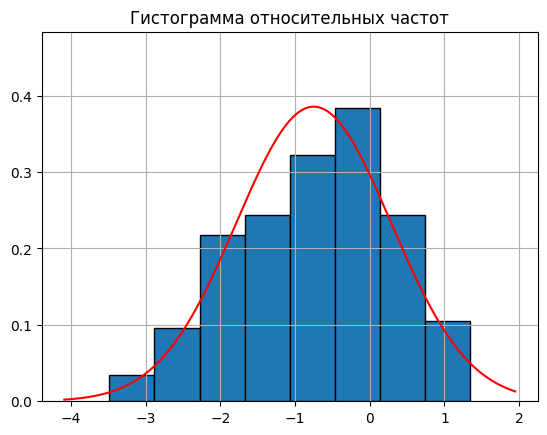

In [9]:
height_N = []

plt.grid(True)
plt.title('Гистограмма относительных частот')
n, bins, rects = plt.hist(norm_sort.tolist(), bins=8, ec='k')

i = 0
for r in rects:
    r.set_height(N['w'].iloc[i]/norm_h)
    height_N.append(N['w'].iloc[i]/norm_h)
    i+=1

x = np.arange(norm_sort[0]-norm_h, norm_sort[-1]+norm_h, 0.001)
plt.plot(x, sps.norm(norm_mean, norm_std).pdf(x), color='red')     

plt.ylim(0, max(height_N)+0.1)
plt.savefig('tables/plot1.jpg')

plt.show()

### Таблица 1.3

In [10]:
table1_3 = pd.DataFrame(columns=['Интервал', 'w_k', 'p_k', '|w_k - p_k|', 'something'])

for k in range(1, m+1):
    
    a = N.iloc[k-1]['w']
    b = table1_2.iloc[k]['p_k']
    
    if k == 1:
        interval = f'[{(norm_sort[0]+(k-1)*norm_h):.5f}, {(norm_sort[0]+k*norm_h):.5f}]'
    else:
        interval = f'({(norm_sort[0]+(k-1)*norm_h):.5f}, {(norm_sort[0]+k*norm_h):.5f}]'
    
    table1_3.loc[k] = [interval, a, b, abs(a-b), len(norm_sort)*(a-b)*(a-b)/b]
    

table1_3.loc[' '] = [' ', table1_3['w_k'].sum(), table1_3['p_k'].sum(), table1_3['|w_k - p_k|'].max(), table1_3['something'].sum()]
table1_3

,Интервал,w_k,p_k,|w_k - p_k|,something
1,"[-3.48576, -2.88202]",0.021053,0.019688,0.001365,0.017972
2,"(-2.88202, -2.27828]",0.057895,0.050162,0.007733,0.226513
3,"(-2.27828, -1.67454]",0.131579,0.115921,0.015657,0.401820
4,"(-1.67454, -1.07080]",0.147368,0.192409,0.045040,2.003239
5,"(-1.07080, -0.46706]",0.194737,0.229416,0.034679,0.996032
6,"(-0.46706, 0.13668]",0.231579,0.196511,0.035068,1.189025
7,"(0.13668, 0.74042]",0.147368,0.120918,0.026451,1.099349
8,"(0.74042, 1.34416]",0.063158,0.053440,0.009718,0.335748
,,0.994737,0.978465,0.045040,6.269698


In [11]:
table1_3.to_excel('tables/table1_3.xlsx')

In [12]:
print(f'Число степеней свободы: {m-3}')

Число степеней свободы: 5


## Задание 2

### Интервальный ряд для равномерного распределения

In [13]:
# TODO magic numbers
a = -1.25; b = 3.07

unif_h = abs(b - a)/m

U = pd.DataFrame(columns=['n', 'w'])
i = 0

for k in range(1, m+1):
    
    if k == 1:
        interval = f'[{(a+(k-1)*unif_h)}, {(a+k*unif_h):.5f}]'
    else:
        interval = f'({(a+(k-1)*unif_h):.5f}, {(a+k*unif_h):.5f}]'
    
    count = 0
    while i < len(unif_sort):
        if unif_sort[i] <= a+k*unif_h:
            i, count = i+1, count+1
        else:
            U.loc[interval] = [count, count/len(unif_sort)]
            break

U.loc[interval] = [count, count/len(unif_sort)]
U.loc[' '] = [U['n'].sum(), U['w'].sum()]
    
U

,n,w
"[-1.25, -0.71000]",28.0,0.147368
"(-0.71000, -0.17000]",26.0,0.136842
"(-0.17000, 0.37000]",25.0,0.131579
"(0.37000, 0.91000]",21.0,0.110526
"(0.91000, 1.45000]",18.0,0.094737
"(1.45000, 1.99000]",25.0,0.131579
"(1.99000, 2.53000]",26.0,0.136842
"(2.53000, 3.07000]",21.0,0.110526
,190.0,1.000000


In [14]:
U.to_excel('tables/table2_1.xlsx')

### Таблица 2.2

In [15]:
table2_2 = pd.DataFrame(columns=['a_k', 'f(a_k)', 'F(a_k)', 'p_k'])

for k in range(m+1):
    
    a_k = a+k*unif_h
    f = sps.uniform(a, b-a).pdf(a_k)
    F = sps.uniform(a, b-a).cdf(a_k)
    
    table2_2.loc[k] = [a_k, f, F, F - sps.uniform(a, b-a).cdf(a+(k-1)*unif_h)]
    
table2_2.loc[' '] = [' ', ' ', ' ', table2_2['p_k'].sum()]
table2_2

,a_k,f(a_k),F(a_k),p_k
0,-1.25,0.231481,0.0,0.000
1,-0.71,0.231481,0.125,0.125
2,-0.17,0.231481,0.25,0.125
3,0.37,0.231481,0.375,0.125
4,0.91,0.231481,0.5,0.125
5,1.45,0.231481,0.625,0.125
6,1.99,0.231481,0.75,0.125
7,2.53,0.231481,0.875,0.125
8,3.07,0.231481,1.0,0.125
,,,,1.000


In [16]:
table2_2.to_excel('tables/table2_2.xlsx')

### Гистограмма относительных частот и график плотности равномерного распределения

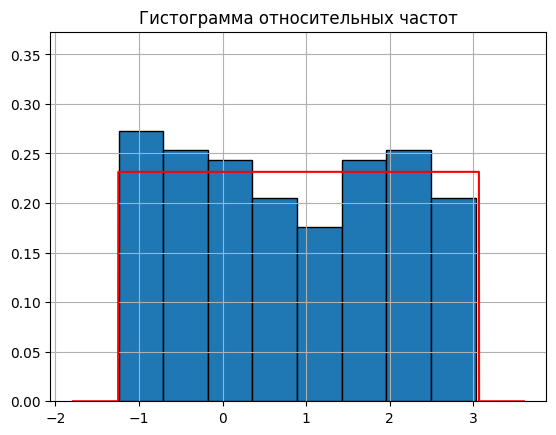

In [17]:
height_U = []

plt.grid(True)
plt.title('Гистограмма относительных частот')
n, bins, rects = plt.hist(unif_sort.tolist(), bins=8, ec='k')

i = 0
for r in rects:
    r.set_height(U['w'].iloc[i]/unif_h)
    height_U.append(U['w'].iloc[i]/unif_h)
    i+=1

x = np.arange(a-unif_h, b+unif_h, 0.001)
plt.plot(x, sps.uniform(a, b-a).pdf(x), color='red')     

plt.ylim(0, max(height_U)+0.1)
plt.savefig('tables/plot2.jpg')

plt.show()

### Таблица 2.3

In [18]:
table2_3 = pd.DataFrame(columns=['Интервал', 'w_k', 'p_k', '|w_k - p_k|', 'something'])

for k in range(1, m+1):
    
    x = U.iloc[k-1]['w']
    y = table2_2.iloc[k]['p_k']
    
    if k == 1:
        interval = f'[{(a+(k-1)*unif_h)}, {(a+k*unif_h):.2f}]'
    else:
        interval = f'({(a+(k-1)*unif_h):.2f}, {(a+k*unif_h):.2f}]'
        
    table2_3.loc[k] = [interval, x, y, round(abs(x-y),5), round(len(unif_sort)*(x-y)*(x-y)/y, 5)]
    

table2_3.loc[' '] = [' ', table2_3['w_k'].sum(), table2_3['p_k'].sum(), table2_3['|w_k - p_k|'].max(), table2_3['something'].sum()]
table2_3

,Интервал,w_k,p_k,|w_k - p_k|,something
1,"[-1.25, -0.71]",0.147368,0.125,0.02237,0.76053
2,"(-0.71, -0.17]",0.136842,0.125,0.01184,0.21316
3,"(-0.17, 0.37]",0.131579,0.125,0.00658,0.06579
4,"(0.37, 0.91]",0.110526,0.125,0.01447,0.31842
5,"(0.91, 1.45]",0.094737,0.125,0.03026,1.39211
6,"(1.45, 1.99]",0.131579,0.125,0.00658,0.06579
7,"(1.99, 2.53]",0.136842,0.125,0.01184,0.21316
8,"(2.53, 3.07]",0.110526,0.125,0.01447,0.31842
,,1.000000,1.000,0.03026,3.34738


In [19]:
table2_3.to_excel('tables/table2_3.xlsx')

In [20]:
print(f'Число степеней свободы: {m-1}')

Число степеней свободы: 7


## Задание 3

### Графики функций распределения

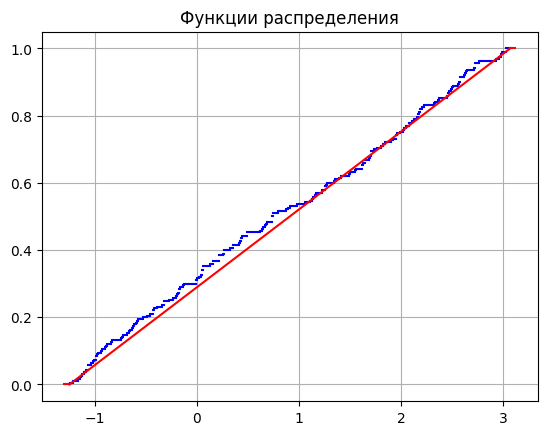

In [21]:
plt.grid(True)
plt.title('Функции распределения')

for i in range(len(unif_sort)-1):
    plt.plot([unif_sort[i], unif_sort[i+1]], [(i+1)/len(unif_sort), (i+1)/len(unif_sort)], color='blue')
    
plt.plot([unif_sort[0]-0.05, unif_sort[0]], [0, 0], color='blue')
plt.plot([unif_sort[-1], unif_sort[-1]+0.05], [1, 1], color='blue')

x = np.arange(a, b, 0.001)
plt.plot(x, (x-a)/(b-a), color='red')

plt.plot([a-0.05, a], [0, 0], color='red')
plt.plot([b, b+0.05], [1, 1], color='red')

plt.savefig('tables/plot3.jpg')
plt.show()

### Таблица 3.1

In [22]:
def F(x):
    if x < a:
        return 0
    elif x > b:
        return 1
    return (x-a)/(b-a)

def F_N(x):
    if x < unif_sort[0]:
        return 0
    elif x >= unif_sort[-1]:
        return 1
    return unif_sort.tolist().index(x)/len(unif)

max_D, max_y = -1000, -1000

for k in unif_sort:
    D_N = abs(F_N(k)-F(k)) if abs(F_N(k)-F(k)) > abs(F_N(k)-F(k)-1/len(unif)) else abs(F_N(k)-F(k)-1/len(unif))
    if D_N > max_D:
        max_D, max_y = D_N, k 
    
table3_1 = pd.DataFrame(columns=['a', 'b', 'N', 'D_N', 'D_N_N', 'y*', 'F(y*)', 'F_N(y*)', 'F_N(y*-0)'])
table3_1.loc[' '] = [a, b, len(unif), max_D, max_D*len(unif)**0.5, max_y, F(max_y), F_N(max_y), F_N(max_y)-1/len(unif)]

table3_1

,a,b,N,D_N,D_N_N,y*,F(y*),F_N(y*),F_N(y*-0)
,-1.25,3.07,190.0,0.044027,0.606874,0.44696,0.392815,0.436842,0.431579


In [23]:
table3_1.to_excel('tables/table3_1.xlsx')